## 라이브러리 및 데이터 가져오기



In [ ]:
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt
import os


print(tf.__version__)   # Tensorflow의 버전을 출력

mnist = keras.datasets.mnist

# MNIST 데이터를 로드. 다운로드하지 않았다면 다운로드까지 자동으로 진행
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(len(x_train))  # x_train 배열의 크기를 출력

2.18.0
11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
60000


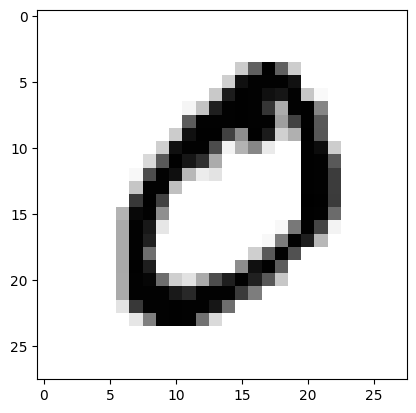

In [ ]:
plt.imshow(x_train[1],cmap=plt.cm.binary)
plt.show()

In [ ]:
flat = x_train[1].flatten()  # 2D → 1D로 평탄화

# 한 줄에 28개씩 출력
for i in range(0, len(flat), 28):
    print(' '.join(f'{val:3}' for val in flat[i:i+28]))

  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253 159  50   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252 253 122   0   0   0   0   0   0
  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 253 252 252  96 189 253 167   0   0   0   0 

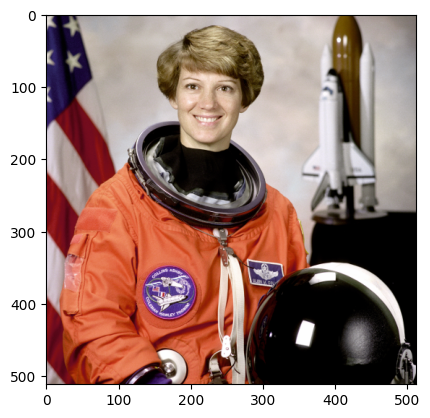

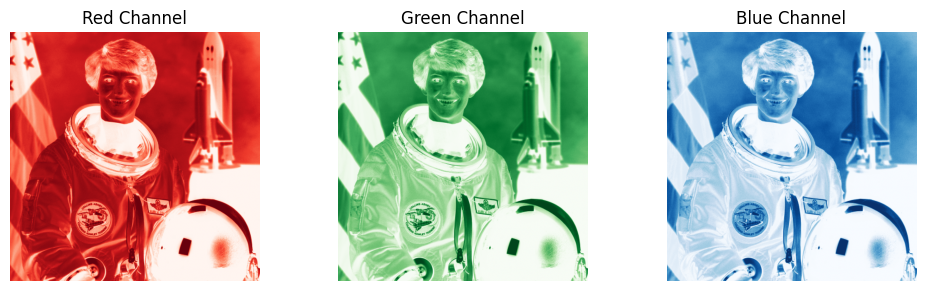

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# 예제 컬러 이미지: 'astronaut' (카메라맨은 흑백이라 RGB용으로 'astronaut' 사용)
img = data.astronaut()  # shape: (512, 512, 3)

# 채널 분리
r_channel = img[:, :, 0]
g_channel = img[:, :, 1]
b_channel = img[:, :, 2]

# 채널 텍스트 출력을 위한 함수
def print_channel(channel, name):
    output = []
    output.append(f'--- {name} Channel ---')
    for row in channel[:10]:  # 상위 10줄만 출력
        output.append(' '.join(f'{val:3}' for val in row[:32]))  # 각 줄 32개만
    return output

# 채널별 숫자 출력 결과 준비
r_output = print_channel(r_channel, 'Red')
g_output = print_channel(g_channel, 'Green')
b_output = print_channel(b_channel, 'Blue')

# plt.imshow(img, cmap=cmap)
plt.imshow(img)

# 채널 시각화
plt.figure(figsize=(10, 3))
for i, (channel, cmap, title) in enumerate(zip(
    [r_channel, g_channel, b_channel],
    ['Reds', 'Greens', 'Blues'],
    ['Red', 'Green', 'Blue']
)):
    plt.subplot(1, 3, i + 1)
    plt.imshow(channel, cmap=cmap)
    plt.title(f'{title} Channel')
    plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
print(y_train[1])

0


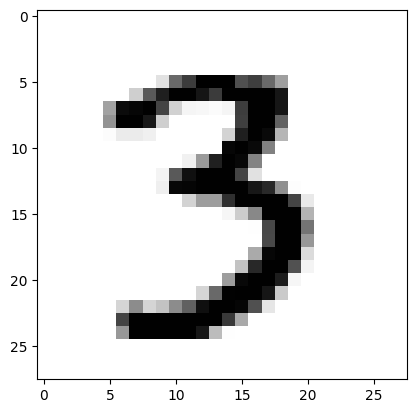

10001 번째 이미지의 숫자는 바로  3 입니다.


In [ ]:
# index에 0에서 59999 사이 숫자를 지정해 보세요.
index=10000
plt.imshow(x_train[index],cmap=plt.cm.binary)
plt.show()
print( (index+1), '번째 이미지의 숫자는 바로 ',  y_train[index], '입니다.')

In [ ]:
print(x_train.shape)

(60000, 28, 28)


In [ ]:
print(x_test.shape)

(10000, 28, 28)


In [ ]:
print('최소값:',np.min(x_train), ' 최대값:',np.max(x_train))

최소값: 0  최대값: 255


인공지능 모델을 훈련시키고 사용할 때, 일반적으로는 입력은 0~1 사이의 값으로 정규화 시켜주는 것이 좋다.

In [ ]:
x_train_norm, x_test_norm = x_train / 255.0, x_test / 255.0
print('최소값:',np.min(x_train_norm), ' 최대값:',np.max(x_train_norm))

최소값: 0.0  최대값: 1.0


## 딥러닝 네트워크 생성 -> Sequential API, 딥러닝 레이어

keras.layers.Conv2D(사용하는 이미지 특징의 수, ..)  
keras.layers.Dense(분류기에 사용되는 뉴런의 숫자, ..) -> 결과적으로 분류해 내야 하는 클래스 수로 지정  
ex) 숫자 인식기에서는 10, 알파벳 인식기에서는 52

In [ ]:
model=keras.models.Sequential()
model.add(keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(32, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(32, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

print('Model에 추가된 Layer 개수: ', len(model.layers))

Model에 추가된 Layer 개수:  7


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### 얼마나 잘 만들었는지 확인

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

## 딥러닝 네트워크 학습시키기

네트워크의 입력은 `(데이터갯수, 이미지 크기 x, 이미지 크기 y, 채널수)`  
따라서 x_train, x_test에 채널 수 정보를 추가

In [ ]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")
print(f"Before Reshape - x_test_norm shape: {x_test_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 1)  # 데이터 수에 -1을 쓰면 reshape시 자동계산
x_test_reshaped=x_test_norm.reshape( -1, 28, 28, 1)

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")
print(f"After Reshape - x_test_reshaped shape: {x_test_reshaped.shape}")

Before Reshape - x_train_norm shape: (60000, 28, 28)
Before Reshape - x_test_norm shape: (10000, 28, 28)
After Reshape - x_train_reshaped shape: (60000, 28, 28, 1)
After Reshape - x_test_reshaped shape: (10000, 28, 28, 1)


학습할 때마다 인식 정확도(accuracy)는 변동 -> 학습용 데이터를 가지고 구한 정확도

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

model.fit(x_train_reshaped, y_train, epochs=10)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 33s 16ms/step - accuracy: 0.8647 - loss: 0.4306
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 39s 15ms/step - accuracy: 0.9799 - loss: 0.0648
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9864 - loss: 0.0445
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9890 - loss: 0.0359
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9910 - loss: 0.0279
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9932 - loss: 0.0215
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9938 - loss: 0.0186
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 16ms/step - accuracy: 0.9955 - loss: 0.0149
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.9954 - loss: 0.0133
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 27s 15ms/step - accuracy: 0.9964 - loss: 0.0113


가장 높은 정확도: 0.9955

## 얼마나 잘 만들었는지 확인하기

테스트용 데이터를 가지고 구한 정확도

In [ ]:
test_loss, test_accuracy = model.evaluate(x_test_reshaped,y_test, verbose=2)
print(f"test_loss: {test_loss}")
print(f"test_accuracy: {test_accuracy}")

313/313 - 2s - 6ms/step - accuracy: 0.9909 - loss: 0.0359
test_loss: 0.03587225452065468
test_accuracy: 0.9908999800682068


정확도 0.9908  
  학습/테스트 데이터의 손글씨 주인이 다르기 때문에 한 번도 본 적이 없는 필체의 손글씨가 섞여 있을 가능성이 높다고 판단.

model.evaluate() 대신 model.predict()를 사용하면 model이 입력값을 보고 실제로 추론한 확률분포 확인 가능

In [ ]:
predicted_result = model.predict(x_test_reshaped)  # model이 추론한 확률값.
predicted_labels = np.argmax(predicted_result, axis=1)

idx=0  #1번째 x_test를 살펴보자.
print('model.predict() 결과 : ', predicted_result[idx])
print('model이 추론한 가장 가능성이 높은 결과 : ', predicted_labels[idx])
print('실제 데이터의 라벨 : ', y_test[idx])

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
model.predict() 결과 :  [2.1411323e-12 5.1511861e-11 4.0049054e-11 1.6993103e-10 1.4750683e-11
 1.9618608e-14 6.4062447e-22 9.9999994e-01 1.0134308e-12 2.3407583e-08]
model이 추론한 가장 가능성이 높은 결과 :  7
실제 데이터의 라벨 :  7


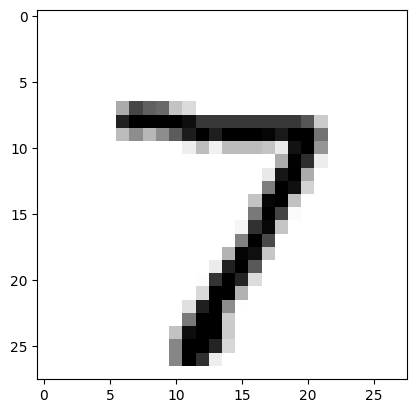

In [ ]:
plt.imshow(x_test[idx],cmap=plt.cm.binary)
plt.show()

예측확률분포: [1.9872475e-15 3.9508155e-16 2.3338354e-12 7.3190469e-01 4.2893613e-13
 2.6809531e-01 4.5378371e-13 3.6992107e-14 1.2625429e-11 5.7905813e-09]
라벨: 5, 예측결과: 3


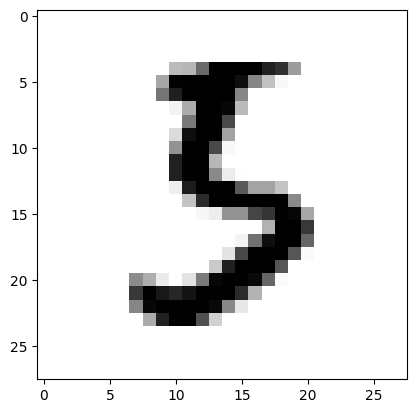

예측확률분포: [1.2753150e-09 3.5920250e-06 7.1430222e-08 1.6310792e-02 8.8132106e-11
 9.8367363e-01 3.3518875e-11 8.2014151e-07 1.0321739e-11 1.0907879e-05]
라벨: 3, 예측결과: 5


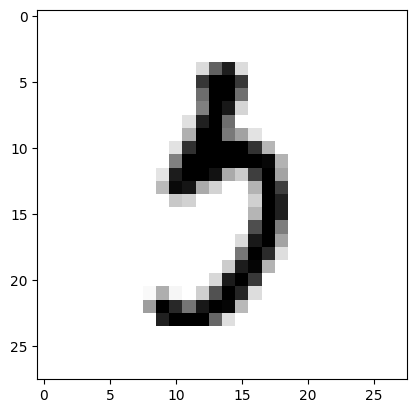

예측확률분포: [5.7623684e-08 3.3377376e-07 7.7229634e-02 1.8984108e-04 2.0087184e-07
 3.2952247e-08 5.4237847e-12 8.9122206e-01 3.1357810e-02 2.5628896e-08]
라벨: 8, 예측결과: 7


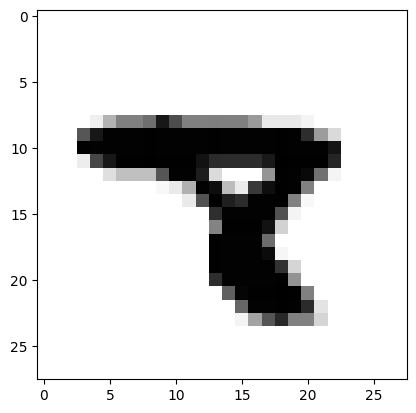

예측확률분포: [9.7360682e-01 5.3049242e-11 2.0368569e-07 2.0075472e-02 4.7155800e-11
 6.3099531e-03 4.8134368e-09 3.3638985e-09 2.6805046e-07 7.3258002e-06]
라벨: 3, 예측결과: 0


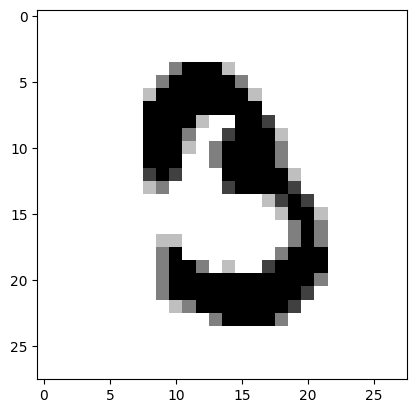

예측확률분포: [3.1252707e-08 3.1739128e-07 2.3807061e-03 1.2645486e-07 1.9207184e-05
 6.0401464e-07 4.4471371e-11 9.9744403e-01 1.5489859e-04 3.6656782e-08]
라벨: 2, 예측결과: 7


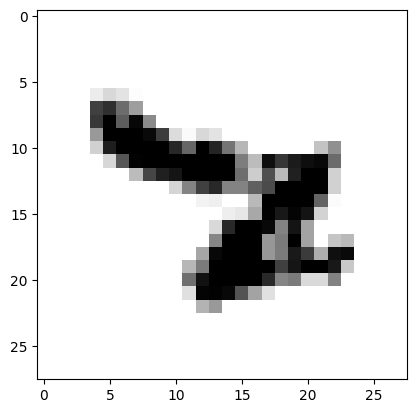

In [ ]:
import random
wrong_predict_list=[]
for i, _ in enumerate(predicted_labels):
    # i번째 test_labels과 y_test이 다른 경우만 모아 봅시다.
    if predicted_labels[i] != y_test[i]:
        wrong_predict_list.append(i)

# wrong_predict_list 에서 랜덤하게 5개만 뽑아봅시다.
samples = random.choices(population=wrong_predict_list, k=5)

for n in samples:
    print("예측확률분포: " + str(predicted_result[n]))
    print("라벨: " + str(y_test[n]) + ", 예측결과: " + str(predicted_labels[n]))
    plt.imshow(x_test[n], cmap=plt.cm.binary)
    plt.show()

## 더 좋은 네트워크 만들어 보기

### 하이퍼파라미터 바꿔보기
- Conv2D 레이어에서 입력 이미지 특징 수 +/-
- Dense 레이어에서 뉴런 수 변경
- 학습 반복 횟수 epoch값 변경

In [ ]:
# 바꿔 볼 수 있는 하이퍼파라미터들
n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10 # 그대로임

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,1)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train_reshaped, y_train, epochs=n_train_epoch)

# 모델 시험
test_loss, test_accuracy = model.evaluate(x_test_reshaped, y_test, verbose=2)
print(f"test_loss: {test_loss} ")
print(f"test_accuracy: {test_accuracy}")

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 10)             │           330 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,762 (120.16 KB)

 Trainable params: 30,762 (120.16 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 30s 15ms/step - accuracy: 0.8622 - loss: 0.4651
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9807 - loss: 0.0647
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9861 - loss: 0.0468
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9893 - loss: 0.0354
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9900 - loss: 0.0328
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 42s 15ms/step - accuracy: 0.9924 - loss: 0.0232
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 40s 15ms/step - accuracy: 0.9932 - loss: 0.0201
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 28s 15ms/step - accuracy: 0.9954 - loss: 0.0153
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 29s 15ms/step - accuracy: 0.9959 - loss: 0.0130
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 31s 16ms/step - accuracy: 0.9964 - loss: 0.0109
313/313 - 2s - 6ms/step - accuracy: 0.9915 - loss: 0.0317
test_loss: 0.03171432763338089 
test_accu

# 프로젝트

In [ ]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.18.0
2.0.2


In [ ]:
!unzip /content/rock_scissor_paper/scissor/scissor.zip -d 가위
!unzip /content/rock_scissor_paper/rock/rock.zip -d 바위
!unzip /content/rock_scissor_paper/paper/paper.zip   -d 보

Archive:  /content/rock_scissor_paper/scissor/scissor.zip
   creating: 가위/scissor/
  inflating: 가위/scissor/0.jpg    
  inflating: 가위/scissor/1.jpg    
  inflating: 가위/scissor/10.jpg   
  inflating: 가위/scissor/100.jpg  
  inflating: 가위/scissor/11.jpg   
  inflating: 가위/scissor/12.jpg   
  inflating: 가위/scissor/13.jpg   
  inflating: 가위/scissor/14.jpg   
  inflating: 가위/scissor/15.jpg   
  inflating: 가위/scissor/16.jpg   
  inflating: 가위/scissor/17.jpg   
  inflating: 가위/scissor/18.jpg   
  inflating: 가위/scissor/19.jpg   
  inflating: 가위/scissor/2.jpg    
  inflating: 가위/scissor/20.jpg   
  inflating: 가위/scissor/21.jpg   
  inflating: 가위/scissor/22.jpg   
  inflating: 가위/scissor/23.jpg   
  inflating: 가위/scissor/24.jpg   
  inflating: 가위/scissor/25.jpg   
  inflating: 가위/scissor/26.jpg   
  inflating: 가위/scissor/27.jpg   
  inflating: 가위/scissor/28.jpg   
  inflating: 가위/scissor/29.jpg   
  inflating: 가위/scissor/3.jpg    
  inflating: 가위/scissor/30.jpg   
  inflating: 가위/scissor/31.jpg   

In [ ]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


## 데이터 불러오기 + resize(28x28)

In [ ]:
def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

  # 파일마다 모두 28x28 사이즈로 바꾸어 저장
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img = old_img.resize(target_size, Image.Resampling.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = "/content/가위/scissor"
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!


In [ ]:
image_dir_path = "/content/바위/rock"
resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

image_dir_path = "/content/보/paper"
resize_images(image_dir_path)

print("보 이미지 resize 완료!")

100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!


In [ ]:
import numpy as np
import glob
import os
from PIL import Image
from sklearn.utils import shuffle

def load_data(img_path, number_of_data=300):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/가위/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/바위/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/보/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

    print("학습데이터(x_train)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

image_dir_path = "/content"
x_train, y_train = load_data(image_dir_path)
x_train, y_train = shuffle(x_train, y_train, random_state=42)
x_train_norm = x_train / 255.0
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)


학습데이터(x_train)의 이미지 개수는 300 입니다.
x_train shape: (300, 28, 28, 3)
y_train shape: (300,)


In [ ]:
print(f"Before Reshape - x_train_norm shape: {x_train_norm.shape}")

x_train_reshaped=x_train_norm.reshape( -1, 28, 28, 3)  # 데이터 수에 -1을 쓰면 reshape시 자동계산

print(f"After Reshape - x_train_reshaped shape: {x_train_reshaped.shape}")

Before Reshape - x_train_norm shape: (300, 28, 28, 3)
After Reshape - x_train_reshaped shape: (300, 28, 28, 3)


라벨:  0


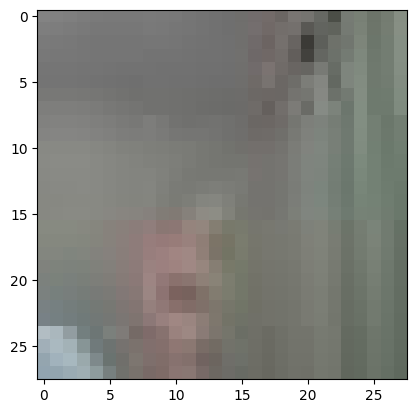

In [ ]:
import matplotlib.pyplot as plt

plt.imshow(x_train[224])
print('라벨: ', y_train[224])

In [ ]:
# n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=30

model=keras.models.Sequential()
model.add(keras.layers.Conv2D(n_channel_1, (3,3), activation='relu', input_shape=(28,28,3)))
model.add(keras.layers.MaxPool2D(2,2))
model.add(keras.layers.Conv2D(n_channel_2, (3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D((2,2)))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(n_dense, activation='relu'))
model.add(keras.layers.Dense(3, activation='softmax'))

model.summary()

Model: "sequential_17"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_37 (Conv2D)              │ (None, 26, 26, 16)     │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_37 (MaxPooling2D) │ (None, 13, 13, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_38 (Conv2D)              │ (None, 11, 11, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_38 (MaxPooling2D) │ (None, 5, 5, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_17 (Flatten)            │ (None, 800)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 32)             │        25,632 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_35 (Dense)                │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 30,819 (120.39 KB)

 Trainable params: 30,819 (120.39 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

# 모델 훈련
model.fit(x_train, y_train, epochs=n_train_epoch)

Epoch 1/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.3620 - loss: 21.6672
Epoch 2/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.3306 - loss: 2.1996
Epoch 3/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.3767 - loss: 1.3718
Epoch 4/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.4600 - loss: 1.1257
Epoch 5/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4275 - loss: 1.2455
Epoch 6/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 29ms/step - accuracy: 0.4093 - loss: 1.1809
Epoch 7/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4982 - loss: 1.0506
Epoch 8/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.6867 - loss: 0.7982
Epoch 9/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - accuracy: 0.6762 - loss: 0.8834
Epoch 10/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.6131 - loss: 0.8005
Epoch 11/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.8003 - loss: 0.6684
Epoch 12/30
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy

In [161]:
import numpy as np
import glob
import os
from PIL import Image
from sklearn.utils import shuffle

def load_data2(img_path, number_of_data=300):
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트 데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

    print("테스트 데이터(y_test)의 이미지 개수는", idx, "입니다.")
    return imgs, labels

In [162]:
image_dir_path = "/content/test/scissor"
resize_images(image_dir_path)
print("가위 이미지 resize 완료!")

image_dir_path = "/content/test/rock"
resize_images(image_dir_path)
print("바위 이미지 resize 완료!")

image_dir_path = "/content/test/paper"
resize_images(image_dir_path)
print("보 이미지 resize 완료!")

(x_test, y_test)=load_data2(image_dir_path)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화
print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

100  images to be resized.
100  images resized.
가위 이미지 resize 완료!
100  images to be resized.
100  images resized.
바위 이미지 resize 완료!
100  images to be resized.
100  images resized.
보 이미지 resize 완료!
테스트 데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 28, 28, 3)
y_test shape: (300,)


In [167]:
# 평가
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print("test_loss: {} ".format(test_loss))
print("test_accuracy: {}".format(test_accuracy))

10/10 - 0s - 15ms/step - accuracy: 0.3333 - loss: 4.6525
test_loss: 4.652461528778076 
test_accuracy: 0.3333333432674408


In [164]:
## 미리 압축해서 업로드

# !unzip 가위_test-samples.zip -d 가위_test
# !unzip 바위_test-samples.zip -d 바위_test
# !unzip 보_test-samples.zip   -d 보_test

In [168]:
y_train

array([2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 2, 0, 2, 0, 1, 2, 2, 2, 1, 1, 0, 1,
       2, 2, 1, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 1, 2, 1, 1, 2, 0, 2, 2, 0, 0, 1, 0, 2, 0, 0, 1, 1, 0,
       0, 2, 0, 1, 1, 1, 2, 1, 1, 2, 0, 0, 0, 2, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 2, 0, 0, 1, 1, 2, 0, 2, 0, 0, 1, 2, 2, 1, 0, 1, 0,
       1, 2, 0, 2, 2, 1, 1, 2, 1, 2, 0, 1, 1, 1, 1, 2, 0, 1, 1, 2, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 1, 2, 2, 1, 0, 0, 0, 2, 1, 2, 1,
       2, 2, 2, 0, 1, 0, 2, 1, 0, 0, 0, 1, 2, 2, 1, 0, 0, 2, 2, 0, 0, 2,
       1, 0, 2, 1, 2, 0, 2, 2, 1, 2, 2, 1, 0, 0, 0, 1, 2, 2, 2, 0, 2, 2,
       0, 2, 0, 1, 0, 2, 1, 2, 2, 1, 0, 1, 1, 2, 0, 0, 2, 0, 0, 2, 1, 0,
       1, 2, 2, 1, 0, 2, 1, 0, 2, 2, 0, 2, 2, 2, 1, 0, 0, 0, 2, 2, 2, 2,
       1, 0, 2, 1, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0,
       0, 1, 2, 1, 2, 2, 0, 0, 1, 1, 2, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 2,
       1, 1, 1, 0, 0, 2, 1, 2, 0, 1, 0, 1, 2, 1], d